In [4]:
# 9 Write a function to compute covariance between two numerical lists from scratch.

def covariance(x, y):
    n = len(x)

    # calculate means
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    # calculate sum of products of deviations
    cov_sum = 0
    for i in range(n):
        cov_sum += (x[i] - mean_x) * (y[i] - mean_y)

    # divide by number of values
    return cov_sum / n
    
x = [2, 4, 6]
y = [1, 3, 5]

result = covariance(x, y)
print("Covariance:", result)

Covariance: 2.6666666666666665


In [7]:
# 10 Write a function to compute Pearson correlation using your covariance function.

def covariance(x, y):
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    cov_sum = 0
    for i in range(n):
        cov_sum += (x[i] - mean_x) * (y[i] - mean_y)

    return cov_sum / n

def pearson_correlation(x, y):
      cov_xy = covariance(x, y)
      var_x = covariance(x, x)
      var_y = covariance(y, y)

      correlation = cov_xy / ((var_x ** 0.5) * (var_y ** 0.5))
      return correlation

x = [2, 4, 6]
y = [1, 3, 5]

result = pearson_correlation(x, y)
print("Pearson Correlation:", result)

Pearson Correlation: 1.0


In [11]:
#11 Modify your correlation function to handle unequal list lengths safely.
def covariance(x, y):
    if len(x) != len(y):
        raise ValueError("Lists must have the same length")

    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    cov_sum = 0
    for i in range(n):
        cov_sum += (x[i] - mean_x) * (y[i] - mean_y)

    return cov_sum / n
    
def pearson_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Lists must have the same length")

    cov_xy = covariance(x, y)
    var_x = covariance(x, x)
    var_y = covariance(y, y)

    # Prevent division by zero
    if var_x == 0 or var_y == 0:
        raise ValueError("Correlation is undefined for zero variance")

    return cov_xy / ((var_x ** 0.5) * (var_y ** 0.5))

x = [2, 4, 6]
y = [1, 3, 5]

print(pearson_correlation(x, y))


1.0


In [19]:
#12 Write code to compute a correlation matrix for multiple numeric columns.

def correlation_matrix(data):
 
    columns = list(data.keys())
    matrix = []

    for col1 in columns:
        row = []
        for col2 in columns:
            corr = pearson_correlation(data[col1], data[col2])
            row.append(round(corr, 2))
        matrix.append(row)

    return columns, matrix

data = {
    "A": [2, 4, 6],
    "B": [1, 3, 5],
    "C": [6, 4, 2]
}

cols, corr_mat = correlation_matrix(data)

print("   ", cols)
for i in range(len(cols)):
    print(cols[i], corr_mat[i])


    ['A', 'B', 'C']
A [1.0, 1.0, -1.0]
B [1.0, 1.0, -1.0]
C [-1.0, -1.0, 1.0]


In [20]:
#13 Implement correlation without using NumPy or Pandas built-in functions.

def covariance(x, y):
    if len(x) != len(y):
        raise ValueError("Lists must have the same length")

    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    cov_sum = 0
    for i in range(n):
        cov_sum += (x[i] - mean_x) * (y[i] - mean_y)

    return cov_sum / n
    
def pearson_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Lists must have the same length")

    cov_xy = covariance(x, y)
    var_x = covariance(x, x)
    var_y = covariance(y, y)

    # Prevent division by zero
    if var_x == 0 or var_y == 0:
        raise ValueError("Correlation is undefined for zero variance")

    return cov_xy / ((var_x ** 0.5) * (var_y ** 0.5))
def correlation_matrix(data):
 
    columns = list(data.keys())
    matrix = []

    for col1 in columns:
        row = []
        for col2 in columns:
            corr = pearson_correlation(data[col1], data[col2])
            row.append(round(corr, 2))
        matrix.append(row)

    return columns, matrix

data = {
    "A": [2, 4, 6],
    "B": [1, 3, 5],
    "C": [6, 4, 2]
}

cols, corr_mat = correlation_matrix(data)

print("   ", cols)
for i in range(len(cols)):
    print(cols[i], corr_mat[i])

    ['A', 'B', 'C']
A [1.0, 1.0, -1.0]
B [1.0, 1.0, -1.0]
C [-1.0, -1.0, 1.0]


In [22]:
#14 Add error handling if input data contains missing values.
def covariance(x, y):
    
    if len(x) != len(y):
        raise ValueError("Lists must have same length")

    # Filter out pairs where either x or y is missing
    filtered_pairs = [(xi, yi) for xi, yi in zip(x, y) 
                      if xi is not None and yi is not None]

    if len(filtered_pairs) == 0:
        raise ValueError("No valid data to compute covariance")

    # Separate filtered values
    x_filtered = [xi for xi, yi in filtered_pairs]
    y_filtered = [yi for xi, yi in filtered_pairs]

    n = len(x_filtered)
    mean_x = sum(x_filtered) / n
    mean_y = sum(y_filtered) / n

    cov_sum = 0
    for xi, yi in zip(x_filtered, y_filtered):
        cov_sum += (xi - mean_x) * (yi - mean_y)

    return cov_sum / n

def pearson_correlation(x, y):
    var_x = covariance(x, x)
    var_y = covariance(y, y)

    # Avoid division by zero
    if var_x == 0 or var_y == 0:
        return 0

    return covariance(x, y) / ((var_x ** 0.5) * (var_y ** 0.5))


def correlation_matrix(data):

    columns = list(data.keys())
    matrix = []

    for col1 in columns:
        row = []
        for col2 in columns:
            corr = pearson_correlation(data[col1], data[col2])
            # round correlation if not None, else keep None
            row.append(round(corr, 2) if corr is not None else None)
        matrix.append(row)

    return columns, matrix

data = {
    "Height": [150, 160, 170, None],
    "Weight": [50, 60, None, 80],
    "Age": [20, 25, 30, 35]
}

cols, corr_mat = correlation_matrix(data)

# Print nicely
print("   ", cols)
for i in range(len(cols)):
    print(cols[i], corr_mat[i])


    ['Height', 'Weight', 'Age']
Height [1.0, 0.25, 0.73]
Weight [0.25, 1.0, 1.12]
Age [0.73, 1.12, 1.0]


In [47]:
#15 Write a function that returns correlation rounded to 2 decimal places.

def covariance(x, y):
      
     # Keep only valid pairs (both not None)
    clean_pairs = [(xi, yi) for xi, yi in zip(x, y) if xi is not None and yi is not None]

    if not clean_pairs:
        return None  # no valid data

    # Separate the cleaned lists
    x_clean = [xi for xi, yi in clean_pairs]
    y_clean = [yi for xi, yi in clean_pairs]

    n = len(x_clean)
    
    mean_x = sum(x_clean) / n
    mean_y = sum(y_clean) / n

    cov_sum = 0
    for i in range(n):
        cov_sum += ((x_clean[i] - mean_x)) * ((y_clean[i] - mean_y))

    return cov_sum / n

def pearson_correlation(x, y):
      cov_xy = covariance(x, y)
      var_x = covariance(x, x)
      var_y = covariance(y, y)
    
    # Avoid division by zero
      if var_x == 0 or var_y == 0:
        return 0

      corr = cov_xy / ((var_x ** 0.5) * (var_y ** 0.5))
      return round(corr, 2)

y = [150, 160, 170, 180, 300]
x = [50, 60, 65, 70, 400]   

result = pearson_correlation(x, y)
print("Pearson Correlation:", result)

Pearson Correlation: -0.67


In [49]:
#16 Compute correlation before and after removing outliers and compare results.

def covariance(x, y):
      
     # Keep only valid pairs (both not None)
    clean_pairs = [(xi, yi) for xi, yi in zip(x, y) if xi is not None and yi is not None]

    if not clean_pairs:
        return None  # no valid data

    # Separate the cleaned lists
    x_clean = [xi for xi, yi in clean_pairs]
    y_clean = [yi for xi, yi in clean_pairs]

    n = len(x_clean)
    
    mean_x = sum(x_clean) / n
    mean_y = sum(y_clean) / n

    cov_sum = 0
    for i in range(n):
        cov_sum += ((x_clean[i] - mean_x)) * ((y_clean[i] - mean_y))

    return cov_sum / n

def pearson_correlation(x, y):
      cov_xy = covariance(x, y)
      var_x = covariance(x, x)
      var_y = covariance(y, y)
    
    # Avoid division by zero
      if var_x == 0 or var_y == 0:
        return 0

      corr = cov_xy / ((var_x ** 0.5) * (var_y ** 0.5))
      return round(corr, 2)

def remove_outliers(data):
    
    if not data:
        return []

    # Sort the data
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    # Find Q1 and Q3
    def median(lst):
        m = len(lst)
        mid = m // 2
        if m % 2 == 0:
            return (lst[mid - 1] + lst[mid]) / 2
        else:
            return lst[mid]

    Q1 = median(sorted_data[:n//2])
    Q3 = median(sorted_data[(n+1)//2:])
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]
    return filtered_data

Height = [150, 160, 170, 180, 300]  # 300 is outlier
Weight = [50, 60, 65, 70, 400]      # 400 is outlier

corr_before = pearson_correlation(Height, Weight)
print("Correlation before removing outliers:", corr_before)

clean_height= remove_outliers(Height)
clean_weight= remove_outliers(Height)
corr_after = pearson_correlation(clean_height,clean_weight)
print("Correlation After removing outliers:", corr_after)

Correlation before removing outliers: 0.99
Correlation After removing outliers: 1.0


In [50]:
#17 Write code to verify symmetry of the correlation matrix.
def is_symmetric(matrix):
    """
    Returns True if the matrix is symmetric, False otherwise
    """
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            # Compare element (i,j) with (j,i)
            if matrix[i][j] != matrix[j][i]:
                return False
    return True

corr_matrix = [
    [1.0, 0.99, 0.95],
    [0.99, 1.0, 0.92],
    [0.95, 0.92, 1.0]
]
if is_symmetric(corr_matrix):
    print("The correlation matrix is symmetric")
else:
    print("The correlation matrix is not symmetric")


The correlation matrix is symmetric


In [54]:
#18 Save the correlation matrix as a CSV file.

import csv

corr_matrix = [
    [1.0, 0.99, 0.95],
    [0.99, 1.0, 0.92],
    [0.95, 0.92, 1.0]
]
cols = ["X", "Y", "Z"]

# Save to CSV
with open("correlation_matrix.csv", "w", newline="") as f:
    writer = csv.writer(f)
    
    # Write header
    writer.writerow([""] + cols)
    
    # Write rows
    for name, row in zip(cols, corr_matrix):
        writer.writerow([name] + row)

print("Correlation matrix saved as 'correlation_matrix.csv'")

Correlation matrix saved as 'correlation_matrix.csv'


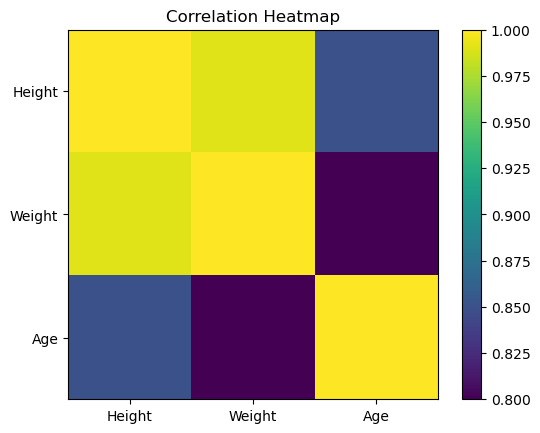

In [55]:
#Plot a correlation heatmap for numerical columns.

import matplotlib.pyplot as plt

columns = ["Height", "Weight", "Age"]

corr_matrix = [
    [1.0, 0.99, 0.85],
    [0.99, 1.0, 0.80],
    [0.85, 0.80, 1.0]
]


plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(columns)), columns)
plt.yticks(range(len(columns)), columns)

plt.title("Correlation Heatmap")
plt.show()


**Explain how to interpret dark vs light colors in a heatmap.**

Interpretation of Dark vs Light Colors in a Heatmap

Dark colors represent a strong relationship between two variables.<br>
This means when one value changes, the other also changes a lot.<br>

Light colors represent a weak or no relationship between two variables.<br>
This means changes in one value do not strongly affect the other.<br>

Rule to remember:

Darker color = stronger correlation<br>
Lighter color = weaker correlation

**Identify the strongest positive and negative correlations from the heatmap.**

Height and Weight: Strong positive correlation because as height increases, weight generally increases.

Weight and Age: Weak correlation because weight does not consistently increase or decrease with age.

**Explain why diagonal values in correlation matrix are always 1.**

The diagonal of a correlation matrix shows how a variable is related to itself.<br>
A variable always changes exactly like itself, so the correlation is 1 (perfect).<br>

Example:<br>
Suppose we have a column Height = [150, 160, 170].<br>
Correlation of Height with Height = 1, because every number matches itself perfectly.<br>

In short: “A variable is always perfectly correlated with itself, so diagonal values are 1.”<br>

**Compare covariance matrix vs correlation matrix visually.**

| Feature             | Covariance Matrix                                    | Correlation Matrix                                                                 |
| ------------------- | ---------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Definition**      | Measures how two variables vary together             | Measures how two variables vary together **relative to their standard deviations** |
| **Scale**           | Depends on the units of the variables (e.g., cm, kg) | Unitless (standardized)                                                            |
| **Range of values** | Can be any number (positive or negative)             | Always between **-1 and 1**                                                        |
| **Diagonal values** | Variance of each variable (not necessarily 1)        | Always **1**                                                                       |
| **Interpretation**  | Harder to compare variables with different units     | Easier to compare strength and direction of relationships                          |
| **Typical Use**     | Used in statistics and portfolio analysis            | Used in correlation analysis and heatmaps                                          |


**Choose two strongly correlated features and explain why.**

Chosen Features: Height and Weight

Explanation: Height and Weight are strongly positively correlated because taller people generally weigh more, and shorter people generally weigh less. This consistent pattern makes their correlation high.

Key point: Strong correlation means one variable tends to increase when the other increases.

***In which scenarios is correlation misleading? Explain using visualization.**

**Correlation can be misleading in these cases:**

1. **Curvy (Non-linear) relationships:**

   * If one variable goes up and then down, correlation might be 0 even though they are related.
   * *Example:* A U-shaped pattern in a scatter plot.

2. **Outliers (Extreme points):**

   * One very high or low value can make correlation look bigger or smaller than it really is.

3. **Causation confusion:**

   * Just because two things move together doesn’t mean one causes the other.
   * *Example:* Ice cream sales and drowning deaths go up in summer, but ice cream doesn’t cause drowning.

4. **Small range of data:**

   * If we look at only a small part of data, correlation can look weaker than it really is.

 Always **look at a scatter plot** to check the real relationship, not just the correlation number.

I



